In [1]:
import graphviz

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC


from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False )

# 과제 1 - 인공신경망 

#### 1. 데이터 구성하기

In [3]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/유방암.csv", encoding = "euc-kr")
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [4]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [5]:
# diagnosis 데이터를 0과 1로 변환
df_raw["diagnosis"] = df_raw["diagnosis"].map({"음성": 0, "양성": 1})
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [6]:
# 데이터 구성하기 - 데이터 분할 (7:3)
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"]

df_train_x , df_test_x , df_train_y , df_test_y = train_test_split(\
    df_raw_x , df_raw_y, test_size = 0.3 , random_state = 1234)

print("분할 전 설명변수 데이터 : " , df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train" , df_train_x.shape , "Test" , df_test_x.shape)

분할 전 설명변수 데이터 :  (320, 30)
분할 후 설명변수 데이터 : Train (224, 30) Test (96, 30)


#### 2. 모델 생성

In [7]:
# 기본 옵션으로 모델 생성
nn_uncustomized = MLPClassifier(random_state = 1234)
nn_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.625
Accuracy on test set: 0.750


In [8]:
# 현재 생성된 모델의 옵션 확인
print(nn_uncustomized.get_params().keys())
print(nn_uncustomized.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


###### Scale 변환

- 데이터를 확인해보았더니 scale 변환이 필요하다고 판단하여 scale 변환을 진행하였다.

In [9]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 데이터 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [10]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data Y size : {}".format(df_scaled_test_x.shape))

train data X size : (224, 30)
test data Y size : (96, 30)


###### scale 조절 후 MPLClassifier 모델 재실행

scale이 조정된 데이터로 새로운 모델 생성하였다.

sclae 변환 전의 모델과 비교해보니, train accuracy와 test accuracy가 상당히 개선된 것을 확인할 수 있었다.

In [11]:
nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
print("Accuracy on training set:{:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set:{:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set:0.996
Accuracy on test set:0.958


###### Hidden Layer 파라미터 조정

hidden layer의 크기를 작게하면 모델의 표현능력이 떨어지고, 과소적합의 가능성이 증가하지만 계산 비용이 감소하여 빠른 계산을 할 수 있다는 장점이 있다.

반대로 hidden layer의 크기를 크게하면 모델이 성능이 좋아지지만 과대적합의 가능성이 존재하고 계산 비용이 증가하는 단점이 있다.

hidden layer의 수에 따라 accuracy를 비교해본 결과, 85일때 Test Accuracy가 제일 높은 것을 확인하여 hidden layer의 수는 85로 선정했다. 

In [12]:
train_accuracy = [] ; test_accuracy = []
para_hidden = [5 *hidden for hidden in range(1,21)]

print(para_hidden)

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden) , random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


In [13]:
# 모델 정확도 확인
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,5,0.964,0.917
1,10,0.982,0.948
2,15,0.982,0.948
3,20,0.991,0.938
4,25,0.996,0.948
5,30,1.000,0.948
6,35,1.000,0.948
7,40,1.000,0.958
8,45,1.000,0.958
9,50,1.000,0.948


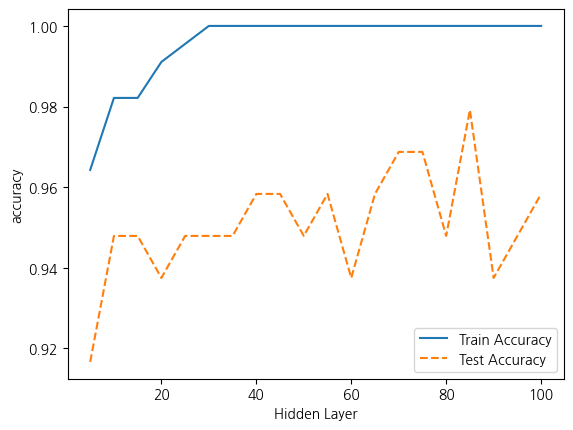

In [14]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy") ; plt.xlabel("Hidden Layer")
plt.legend()

In [15]:
hidden_layer_sizes = 85

###### Activation 파라미터 조정

활성화 함수에 따른 모델 성능을 비교해본 결과 Test Accuracy가 "relu"일 때 가장 높아 해당 함수를 선정하였다.

In [16]:
train_accuracy = [] ; test_accuracy = []
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (85,85) , random_state = 1234)
    #nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,100,60) , random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

In [17]:
# 모델 정확도 확인
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.991,0.938
1,tanh,1.000,0.948
2,relu,1.000,0.979


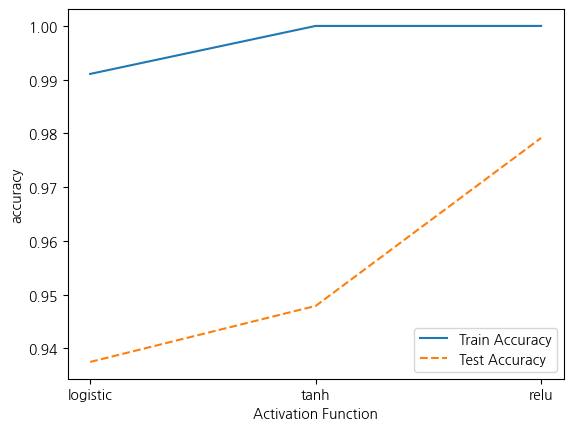

In [18]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy") ; plt.xlabel("Activation Function")
plt.legend()

In [19]:
activation = "relu"

###### Solver 파라미터 조정

가중치 최적화 변경에 따른 모델 성능을 비교해본 결과 Test Accuracy가 "adam"일 때 가장 높아 해당 함수를 선정하였다.

In [20]:
train_accuracy = [] ; test_accuracy = []
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation = "relu" , hidden_layer_sizes = (85,85) , random_state = 1234)
    #nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,100,60) , random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

In [21]:
# 모델 정확도 확인
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.958
1,sgd,0.987,0.938
2,adam,1.000,0.979


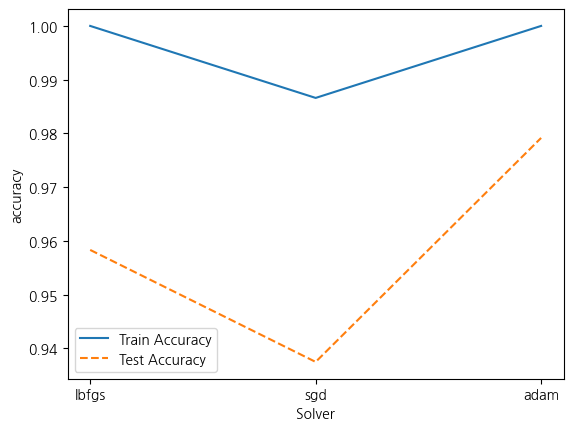

In [22]:
# 모델 정확도 그래프 확인
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy") ; plt.xlabel("Solver")
plt.legend()

In [23]:
solver = "adam"

###### Mini batch 파라미터 조정

Mini Batch 사이즈가 크면 한 번에 더 많은 샘플이 처리되므로 계산 속도가 향상될 수 있지만, 과적합의 가능성이 존재한다.
사이즈가 적을 경우에는 반대의 상황이 일어나므로 적절한 수치를 찾는 것이 중요하다.

Mini Batch가 80과 120일 때 Test Accuracy가 가장 큰 것을 확인할 수 있는데, 과적합을 줄이기 위해 80으로 선정한다. 

In [24]:
train_accuracy = [] ; test_accuracy = []
para_batch = [20 * batch for batch in range(1,10)]

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation = "relu" ,
                       hidden_layer_sizes = (85,85) , random_state = 1234)
    #nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,100,60) , random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

[20, 40, 60, 80, 100, 120, 140, 160, 180]


In [25]:
# 모델 정확도 확인
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,1.0,0.979
1,40,1.0,0.979
2,60,1.0,0.979
3,80,1.0,0.990
4,100,1.0,0.979
5,120,1.0,0.990
6,140,1.0,0.979
7,160,1.0,0.979
8,180,1.0,0.979


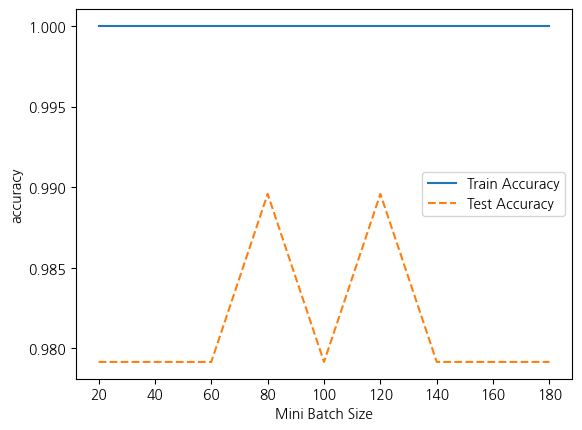

In [26]:
# 모델 정확도 그래프 확인
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy") ; plt.xlabel("Mini Batch Size")
plt.legend()

In [27]:
batch_size = 80

###### 3. 최종 모델 선정

최종 모델의 파라미터는 위의 과정을 거쳐 hidden layer는 85, 활성화 함수는 "relu" , 가중치 최적화는 "adam" , 배치 사이즈는 80 으로 선정했다.

클래스 0에 대한 f1-score는 0.993로 유방암이 음성인지 모델이 잘 예측하고 있는 것는 것으로 보이고, 클래스 1도 f1-score이 0.980으로 유방암이 양성인지에 대한 높은 예측력을 가진다고 볼 수 있다.

모델의 예측 정확도는 0.990으로 성능이 뛰어난 모델로 볼 수 있다. 추가적인 파라미터 조정없이 모델을 적용해도 충분하다고 생각이 든다.

In [28]:
# 최종 모델 
nn_final = MLPClassifier(hidden_layer_sizes = (85,85), activation="relu", solver = "adam" , batch_size = 80,
                        random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

print("Accuracy on training set : {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))
print("Accuracy on test set : {:.3f}\n".format(nn_final.score(df_scaled_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set : 1.000
Accuracy on test set : 0.990

Confusion matrix: 
[[71  1]
 [ 0 24]]
              precision    recall  f1-score   support

           0      1.000     0.986     0.993        72
           1      0.960     1.000     0.980        24

    accuracy                          0.990        96
   macro avg      0.980     0.993     0.986        96
weighted avg      0.990     0.990     0.990        96



###### 4. 결론

인공신경망은 복잡하고 비선형적인 문제에 대해서도 좋은 성능을 발휘할 수 있는 알고리즘이다.

본 과제에서도 다른 기법과 비교했을 때, 모델의 정확도가 0.990으로 가장 뛰어난 성능을 보였다. 이 결과를 통해서 인공신경망이 실제 데이터셋에 적용될 때도 높은 예측력을 가질 것으로 기대할 수 있다.

인공신경망은 다양한 복잡한 문제에 적용 가능하며, 적절한 조정과 개선을 통해 실제 데이터셋에서 우수한 예측력을 발휘할 수 있다고 생각한다.

# 과제 2 - KNN

#### 1. 데이터 구성하기

In [29]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/유방암.csv", encoding = "euc-kr")
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [30]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [31]:
# diagnosis 데이터를 0과 1로 변환
df_raw["diagnosis"] = df_raw["diagnosis"].map({"음성": 0, "양성": 1})
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [32]:
# 데이터 구성하기 - 데이터 분할 (7:3)
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"]

df_train_x , df_test_x , df_train_y , df_test_y = train_test_split(\
    df_raw_x , df_raw_y, test_size = 0.3 , random_state = 1234)

print("분할 전 설명변수 데이터 : " , df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train" , df_train_x.shape , "Test" , df_test_x.shape)

분할 전 설명변수 데이터 :  (320, 30)
분할 후 설명변수 데이터 : Train (224, 30) Test (96, 30)


#### 2. 모델 생성

In [33]:
# 기본 옵션으로 모델생성
knn_uncutomized = KNeighborsClassifier()
knn_uncutomized.fit(df_train_x, df_train_y)

print("Accuracy on training set:{:.3f}".format(knn_uncutomized.score(df_train_x, df_train_y)))
print("Accuracy on test set:{:.3f}".format(knn_uncutomized.score(df_test_x, df_test_y)))

Accuracy on training set:0.942
Accuracy on test set:0.906


In [34]:
# 현재 생성된 모델의 옵션 확인
print(knn_uncutomized.get_params().keys())
print(knn_uncutomized.get_params().values())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
dict_values(['auto', 30, 'minkowski', None, None, 5, 2, 'uniform'])


###### n_neighbors (이웃 수) 파라미터 조정

일반적으로 이웃 수가 작을수록 모델은 더 복잡해지고 노이즈에 민감해질 수 있으며, 이웃 수가 클수록 모델은 더 단순해지고 과소적합될 수 있다. 

Test Accuracy를 확인한 결과 이웃수가 6일때 가장 높은 값을 보였고, Train Accuracy와 큰 차이가 없어 과적합 되지 않았다고 판단하여 이웃수는 6으로 선정하였다.

In [35]:
# n_estimators : 트리 수 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.865
1,2,0.942,0.906
2,3,0.933,0.885
3,4,0.929,0.896
4,5,0.942,0.906
5,6,0.946,0.927
6,7,0.938,0.917
7,8,0.933,0.917
8,9,0.929,0.917
9,10,0.911,0.896


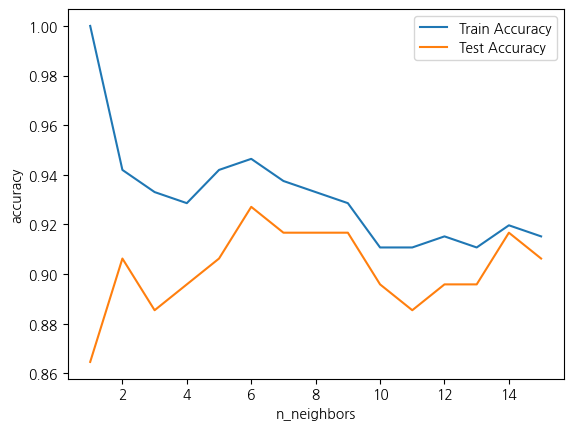

In [36]:
# 모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-" , label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "-" , label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend()

In [37]:
n_neighbors = 6

###### 가중치 별 이웃 수 증가에 따른 정확도 변화

"uniform" 가중치는 모든 이웃 샘플에 동일한 가중치를 부여하는 방식을 의미하고, "distance" 가중치는 이웃 샘플들 간의 거리에 따라 가중치를 부여하여 예측하는 방식이다.

이웃 수를 증가시키며 두가지 가중치 방식을 비교한 결과 "distance" 방식은 train accuracy가 모든 이웃 수에 대해 1로써 과적합된 것을 확인할 수 있었다. 

따라서 가중치 방식은 "uniform" 방식으로 선정하였다.

In [38]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(1,11)] * 2

para_weights = (["uniform"]) * 10 + (["distance"] * 10) 

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors , weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.865
1,2,uniform,0.942,0.906
2,3,uniform,0.933,0.885
3,4,uniform,0.929,0.896
4,5,uniform,0.942,0.906
5,6,uniform,0.946,0.927
6,7,uniform,0.938,0.917
7,8,uniform,0.933,0.917
8,9,uniform,0.929,0.917
9,10,uniform,0.911,0.896


In [39]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors" , columns = "Weights" ,
                                                     values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.864583  0.864583
2                   1.0  0.941964     0.864583  0.906250
3                   1.0  0.933036     0.885417  0.885417
4                   1.0  0.928571     0.864583  0.895833
5                   1.0  0.941964     0.895833  0.906250
6                   1.0  0.946429     0.895833  0.927083
7                   1.0  0.937500     0.906250  0.916667
8                   1.0  0.933036     0.906250  0.916667
9                   1.0  0.928571     0.916667  0.916667
10                  1.0  0.910714     0.895833  0.895833

In [40]:
level0 =df_accuracy_weights_pivot.columns.get_level_values(0)
level1 =df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.864583,0.864583
2,1.0,0.941964,0.864583,0.906250
3,1.0,0.933036,0.885417,0.885417
4,1.0,0.928571,0.864583,0.895833
5,1.0,0.941964,0.895833,0.906250


<Axes: xlabel='Neighbors'>

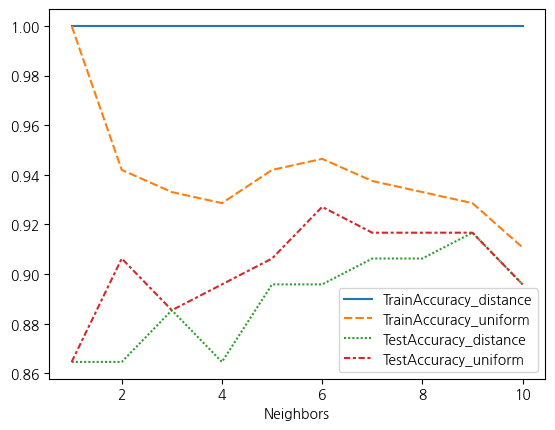

In [41]:
sns.lineplot(data = df_accuracy_weights_pivot)

In [42]:
weights = "uniform"

###### 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

유클리디안과 맨허튼 방법을 비교해본 결과, 전체적으로 유클리디안 방식이 더 높은 test accuracy 값을 확인할 수 있었다.
따라서, 거리 계산 방식은 유클리디안으로 선정한다.

In [43]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(1,11)] * 2

para_metric = (["euclidean"]) * 10 + (["manhattan"] * 10) 

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors , metric = v_metric , weights = "uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,euclidean,1.000,0.865
1,2,euclidean,0.942,0.906
2,3,euclidean,0.933,0.885
3,4,euclidean,0.929,0.896
4,5,euclidean,0.942,0.906
5,6,euclidean,0.946,0.927
6,7,euclidean,0.938,0.917
7,8,euclidean,0.933,0.917
8,9,euclidean,0.929,0.917
9,10,euclidean,0.911,0.896


In [44]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors" , columns = "Metric" ,
                                                     values = ["TrainAccuracy", "TestAccuracy"])

level0 =df_accuracy_metric_pivot.columns.get_level_values(0)
level1 =df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
df_accuracy_metric_pivot.head()

,TrainAccuracy_euclidean,TrainAccuracy_manhattan,TestAccuracy_euclidean,TestAccuracy_manhattan
Neighbors,,,,
1,1.000000,1.000000,0.864583,0.875000
2,0.941964,0.955357,0.906250,0.947917
3,0.933036,0.933036,0.885417,0.916667
4,0.928571,0.928571,0.895833,0.906250
5,0.941964,0.941964,0.906250,0.927083


<Axes: xlabel='Neighbors'>

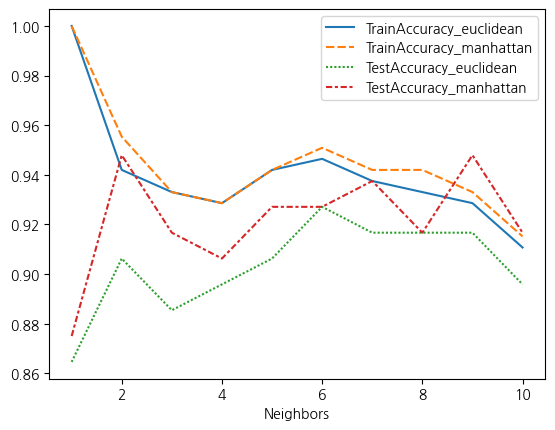

In [45]:
sns.lineplot(data = df_accuracy_metric_pivot)

In [46]:
para_metric = "euclidean"

###### 3. 최종 모델 선정

최종 모델의 파라미터는 위의 과정을 거쳐 이웃 수는 6, 가중치는 "uniform" , 거리 계산 방식은 "euclidean" 선정했다.

클래스 0에 대한 f1-score는 0.951로 유방암이 음성인지 모델이 잘 예측하고 있는 것는 것으로 보인다. 하지만 클래스 1에 대한 f1-score는 0.857으로 클래스 0에 비해 정확도와 재현율이 낮은 것을 확인할 수 있고, 유방암이 양성인지에 대한 예측력은 떨어진다고 볼 수 있다. 

모델의 예측 정확도는 0.927로 성능이 나쁘지 않은 모델이라고 볼 수 있으나, 유방암이 양성인지에 대한 예측력이 떨어지므로, 모델의 성능을 더 향상시키기 위해 추가적인 조정이 필요하다고 생각된다.

In [47]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors = 6 , weights = "uniform", metric = "euclidean")
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)

print("train data accuracy: {0:.3f}".format(knn_model.score(df_train_x, df_train_y)))
print("test data accuracy: {0:.3f}".format(knn_model.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits = 3))

train data accuracy: 0.946
test data accuracy: 0.927
Confusion matrix: 
[[68  4]
 [ 3 21]]
              precision    recall  f1-score   support

           0      0.958     0.944     0.951        72
           1      0.840     0.875     0.857        24

    accuracy                          0.927        96
   macro avg      0.899     0.910     0.904        96
weighted avg      0.928     0.927     0.928        96



###### 4. 결론

KNN은 차원이 증가함에 따라 성능이 저하될 수 있다. 고차원 데이터에서는 데이터 간의 거리가 서로 멀어지는 경향이 있어 이웃 간의 거리 비교가 어려워지기 때문이다.  

또, KNN은 데이터가 많을수록 계산 비용이 증가하기 때문에 데이터셋이 커질 수록 시간과 메모리 측면에서 비효율적일 수 있다.

과제를 통해 만든 모델은 데이터 셋이 작기 때문에 높은 정확도가 나왔다고 판단이 된다. 적은 표본에서는 잘 맞추지만, 실제 데이터를 통해 학습시켰을 경우에도 해당 기법이 잘 예측할지는 확신할 수 없다.

따라서, 데이터 셋을 보고 적절한 기법을 선정하는 것이 중요하다고 생각이 든다.